<a href="https://colab.research.google.com/github/dtphuong2612/ESSAY/blob/main/Xception_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import UpSampling2D, AveragePooling2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential,Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from imutils import paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = list(paths.list_images('/content/drive/MyDrive/Phuong/data'))
len(image_path)

4026

In [ ]:
list_image = []
for (j, imagePath) in enumerate(image_path):
    print(imagePath)
    image = load_img(imagePath)
    
    list_image.append(image) 

/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 232913.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 232942.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 233522.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 233127.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 232651.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 232552.png
/content/drive/MyDrive/Phuong/data/Closed/images - 2022-03-27T231216.079.jpg
/content/drive/MyDrive/Phuong/data/Closed/images - 2022-03-27T231100.116.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 232136.png
/content/drive/MyDrive/Phuong/data/Closed/images - 2022-03-27T231123.771.jpg
/content/drive/MyDrive/Phuong/data/Closed/images - 2022-03-27T230900.655.jpg
/content/drive/MyDrive/Phuong/data/Closed/images - 2022-03-27T231115.159.jpg
/content/drive/MyDrive/Phuong/data/Closed/Screenshot 2022-03-27 232120.png
/content/drive/

4026


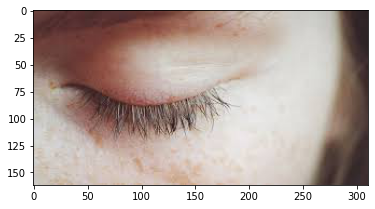

In [ ]:
print(len(list_image))
for i in range(len(list_image)):
  list_image[i] = np.array(list_image[i])
plt.imshow(list_image[200])

In [ ]:
for i in range(len(list_image)):
  list_image[i] = cv2.resize(list_image[i],(32,32))

In [ ]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

labels = [p.split(os.path.sep)[-2] for p in image_path]
print(labels)
names = []
for l in labels:
  if l not in names:
    names.append(l)
print(names)
index = []
le = LabelEncoder()
labels = le.fit_transform(labels)

for l in labels:
  if l not in index:
    index.append(l)
print(index)
dict_id = dict(zip(names,index))
print(dict_id)

#One-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

['Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed', 'Closed',

In [ ]:
for i in range(len(list_image)):
  list_image[i] = np.expand_dims(list_image[i], axis = 0)
  #list_image[i] = tf.keras.applications.inception_v3.preprocess_input((list_image[i]))
list_image = np.vstack(list_image)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(list_image, labels,test_size=0.2, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
num_classes = 2
x_train = x_train / 255.
x_val = x_val / 255.
X_test = X_test / 255.
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
Y_test = to_categorical(Y_test, num_classes)
aug_train = ImageDataGenerator(rotation_range=30, shear_range=0.2,
                               horizontal_flip=True,fill_mode='nearest')

aug_train.fit(x_train)

print('x_train shape: ', x_train.shape)
print('x_val shape: ', x_val.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)
print('y_test shape: ', Y_test.shape)

x_train shape:  (2576, 32, 32, 3)
x_val shape:  (644, 32, 32, 3)
x_test shape:  (806, 32, 32, 3)
y_train shape:  (2576, 2)
y_val shape:  (644, 2)
y_test shape:  (806, 2)


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar100
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception


In [ ]:
_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



model_ = Sequential()
model_.add(UpSampling2D(input_shape=(32,32,3)))
model_.add(UpSampling2D())
model_.add(ZeroPadding2D(padding=(48, 48)))
model_.add(_model)
model_.add(GlobalAveragePooling2D())
model_.add(Dense(256, activation='relu'))
model_.add(Dropout(.25))
model_.add(BatchNormalization())
model_.add(Dense(2, activation='softmax'))

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
sgd = SGD(lr = 1e-3, momentum = 0.9, nesterov = True)
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, restore_best_weights = True, verbose = 1)
rlrop = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', patience = 4, 
                        factor = 0.5, min_lr = 1e-6, verbose = 1)
model_.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['acc'])
checkpoint = ModelCheckpoint(filepath='./_model_2.h5',
                             monitor='val_acc',
                             verbose=1,
                              save_best_only=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_3= model_.fit(aug_train.flow(x_train, y_train,
                                  batch_size=32),
                                  steps_per_epoch=x_train.shape[0] // 32,
                                  epochs=20,
                                  validation_data=aug_train.flow((x_val, y_val),batch_size=32), validation_steps=x_val.shape[0] // 32 , callbacks = checkpoint)

Epoch 1/20
80/80 [==============================] - ETA: 0s - loss: 0.1059 - acc: 0.9603
Epoch 1: val_acc improved from -inf to 0.82344, saving model to ./_model_2.h5
80/80 [==============================] - 39s 435ms/step - loss: 0.1059 - acc: 0.9603 - val_loss: 0.3810 - val_acc: 0.8234
Epoch 2/20
80/80 [==============================] - ETA: 0s - loss: 0.0375 - acc: 0.9862
Epoch 2: val_acc improved from 0.82344 to 0.98125, saving model to ./_model_2.h5
80/80 [==============================] - 32s 402ms/step - loss: 0.0375 - acc: 0.9862 - val_loss: 0.1052 - val_acc: 0.9812
Epoch 3/20
80/80 [==============================] - ETA: 0s - loss: 0.0322 - acc: 0.9898
Epoch 3: val_acc improved from 0.98125 to 0.99531, saving model to ./_model_2.h5
80/80 [==============================] - 32s 401ms/step - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0267 - val_acc: 0.9953
Epoch 4/20
80/80 [==============================] - ETA: 0s - loss: 0.0220 - acc: 0.9949
Epoch 4: val_acc improved from 0.99531

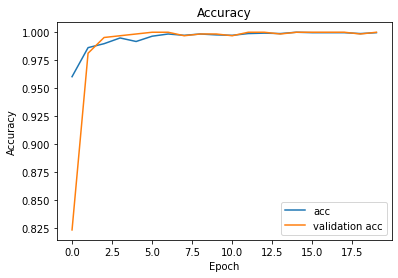

In [ ]:
fig = plt.figure()
Epoch = 20

plt.plot(np.arange(0, Epoch), history_3.history['acc'], label='acc')
plt.plot(np.arange(0, Epoch), history_3.history['val_acc'], label='validation acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

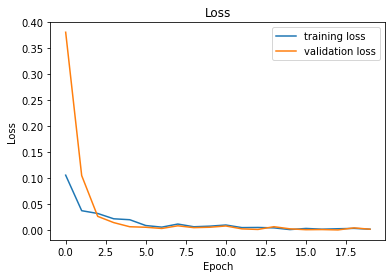

In [ ]:
fig = plt.figure()
epoch = 20
plt.plot(np.arange(0, epoch), history_3.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), history_3.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
def show_distinct_people(img,label):
    fig, axarr=plt.subplots(nrows=2, ncols=7, figsize=(18, 5))
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in range(14):
        
        image_index=random.choice(range(1
                            ,2000,10))
        axarr[unique_id].imshow(img[image_index])
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{} - {}".format(unique_id,label[image_index]))
    plt.suptitle("There are 14 distinct people in the dataset")

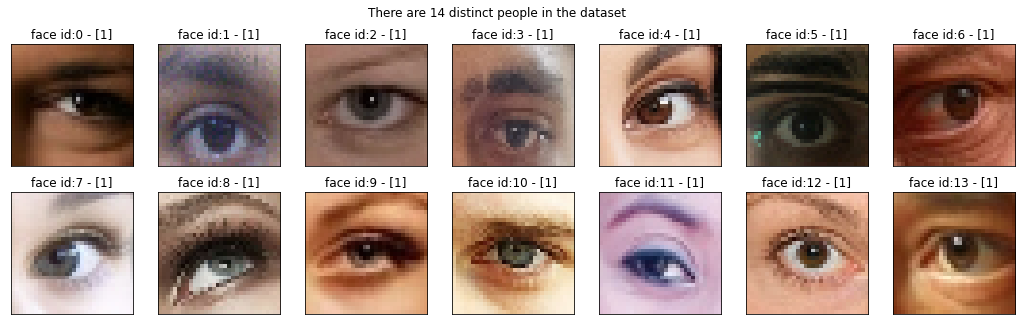

In [ ]:
show_distinct_people(list_image,labels)

In [ ]:
predict_x=model_.predict(X_test) 
predict_x

array([[6.2232895e-05, 9.9993777e-01],
       [9.9999189e-01, 8.0641885e-06],
       [9.5849680e-07, 9.9999905e-01],
       ...,
       [9.9999142e-01, 8.5669335e-06],
       [2.1100153e-04, 9.9978906e-01],
       [8.4394634e-07, 9.9999917e-01]], dtype=float32)

In [ ]:
classes_x=np.argmax(predict_x,axis=1)


In [ ]:
len(classes_x)

806

In [ ]:
len(Y_test)

806

In [ ]:
Y_test_ = np.argmax(Y_test,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test_, classes_x)

print(cf_matrix)

[[427   0]
 [  1 378]]


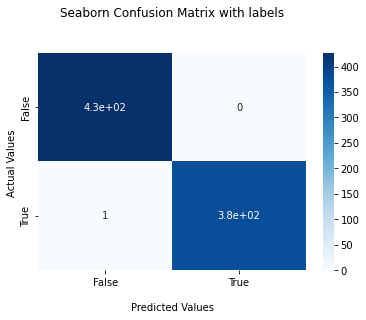

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("The validation accuracy is :", history_3.history['val_acc'][-1])
print("The training accuracy is :", history_3.history['acc'][-1])
print("The validation loss is :", history_3.history['val_loss'][-1])
print("The training loss is :", history_3.history['loss'][-1])

The validation accuracy is : 1.0
The training accuracy is : 0.9996069073677063
The validation loss is : 0.0019191121682524681
The training loss is : 0.0019355332478880882


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(Y_test_, classes_x))

accuracy =  0.9987593052109182


In [ ]:
model_.save("/content/drive/MyDrive/Phuong/Xception.h5")


In [ ]:
model_.save_weights("/content/drive/MyDrive/Phuong/Xception_w.h5")

In [ ]:
model1 = load_model("/content/drive/MyDrive/Phuong/Xception.h5")

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
classes_=np.argmax(y_pred,axis=1)

In [ ]:
print('accuracy = ',accuracy_score(Y_test_, classes_))

accuracy =  0.9987593052109182
